###### Credit : superdatascience.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
result = pd.read_csv('H-1B disclosure data.csv', encoding = 'ISO-8859-1')
naics = pd.read_csv('naics codes.csv', encoding = 'ISO-8859-1')
states = pd.read_csv('states population.csv', encoding = 'ISO-8859-1')

In [3]:
result.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93533 entries, 0 to 93532
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CASE_NUMBER            93533 non-null  object
 1   CASE_STATUS            93533 non-null  object
 2   CASE_SUBMITTED         93533 non-null  object
 3   DECISION_DATE          93533 non-null  object
 4   VISA_CLASS             93533 non-null  object
 5   EMPLOYMENT_START_DATE  93529 non-null  object
 6   EMPLOYMENT_END_DATE    93532 non-null  object
 7   EMPLOYER_NAME          93527 non-null  object
 8   EMPLOYER_STATE         93528 non-null  object
 9   EMPLOYER_POSTAL_CODE   93533 non-null  object
 10  JOB_TITLE              93533 non-null  object
 11  SOC_CODE               93533 non-null  object
 12  SOC_NAME               93533 non-null  object
 13  NAICS_CODE             93533 non-null  int64 
 14  PREVAILING_WAGE        93533 non-null  int64 
dtypes: int64(2), object

In [5]:
naics.head()

,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


In [6]:
naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAICS Code   4673 non-null   int64 
 1   NAICS Title  4673 non-null   object
 2   Unnamed: 2   1 non-null      object
dtypes: int64(1), object(2)
memory usage: 109.7+ KB


In [7]:
states.head()

,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


In [8]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State abbreviation   50 non-null     object
 1   State                50 non-null     object
 2   Population estimate  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


## EDA

In [9]:
# Top 10 most populated states in the US

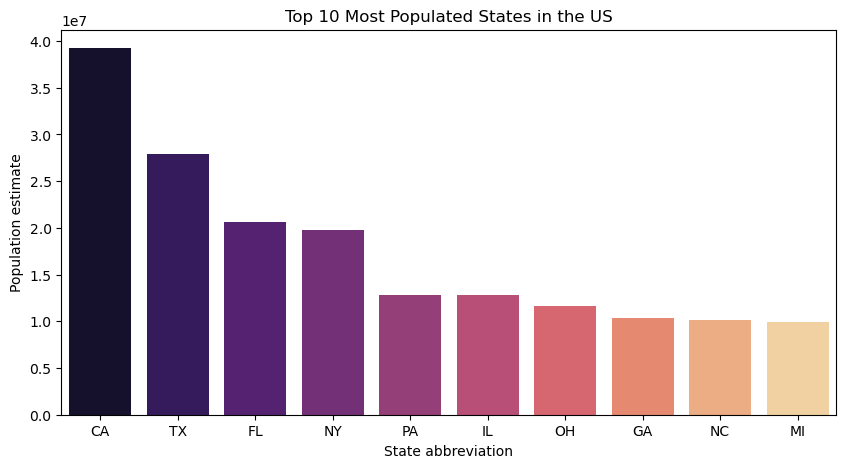

In [10]:
plt.figure(figsize = (10, 5))
sns.barplot(states.head(10), x = 'State abbreviation', y = 'Population estimate', palette = 'magma')

plt.title('Top 10 Most Populated States in the US')
plt.show()

In [11]:
# Top 10 states who employeed most of the foreign workers with work permit in the US in 2016

In [12]:
employer_state = result['EMPLOYER_STATE'].value_counts()
employer_state = pd.DataFrame(employer_state).reset_index()

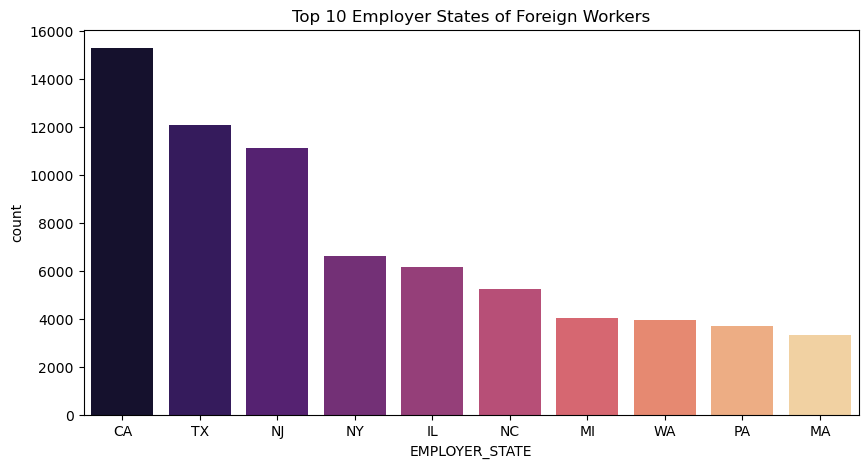

In [13]:
plt.figure(figsize = (10, 5))
sns.barplot(employer_state.head(10), x = 'EMPLOYER_STATE', y = 'count', palette = 'magma')

plt.title('Top 10 Employer States of Foreign Workers')
plt.show()

In [14]:
# Visa classes issued in 2016

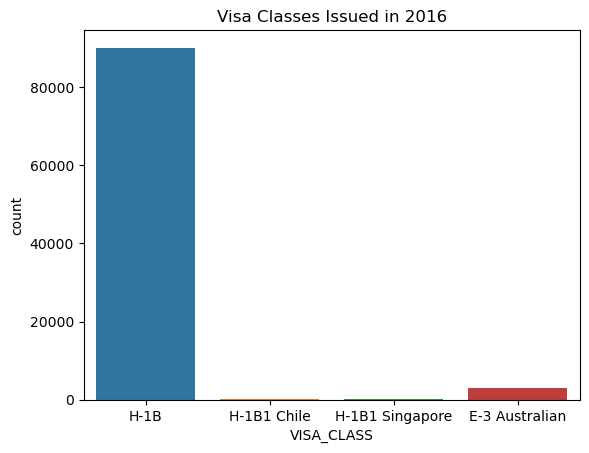

In [15]:
sns.countplot(result, x = 'VISA_CLASS')

plt.title('Visa Classes Issued in 2016')
plt.show()

In [16]:
# Relationship between visa class and prevailing wage for each class

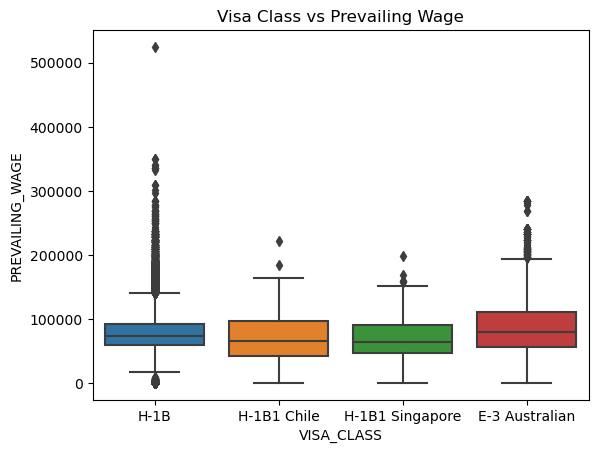

In [17]:
sns.boxplot(result, x = 'VISA_CLASS', y = 'PREVAILING_WAGE')

plt.title('Visa Class vs Prevailing Wage')
plt.show()

In [18]:
# Visa application status distribution

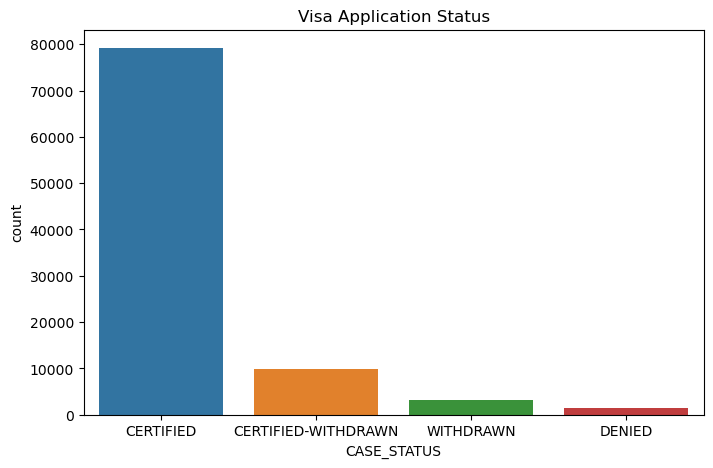

In [19]:
plt.figure(figsize = (8, 5))
sns.countplot(result, x = 'CASE_STATUS')

plt.title('Visa Application Status')
plt.show()

## Top 10 occupations for H1B visas with certified status

In [20]:
certified_result = result[result['CASE_STATUS'] == 'CERTIFIED']

In [21]:
certified_occupations = pd.DataFrame(certified_result['JOB_TITLE'].value_counts()).reset_index()

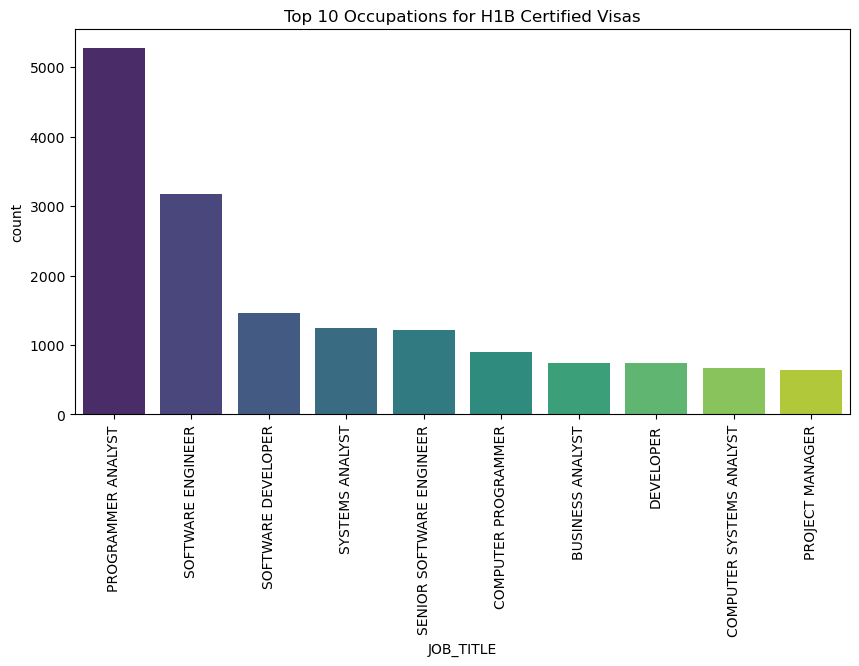

In [22]:
plt.figure(figsize = (10, 5))
sns.barplot(certified_occupations.head(10), x = 'JOB_TITLE', y = 'count', palette = 'viridis')

plt.title('Top 10 Occupations for H1B Certified Visas')
plt.xticks(rotation = 90)
plt.show()

## Companies that hire more data scientists

In [23]:
company_ds = result[result['JOB_TITLE'] == 'DATA SCIENTIST']['EMPLOYER_NAME'].value_counts()

In [24]:
company_ds = pd.DataFrame(company_ds).reset_index()

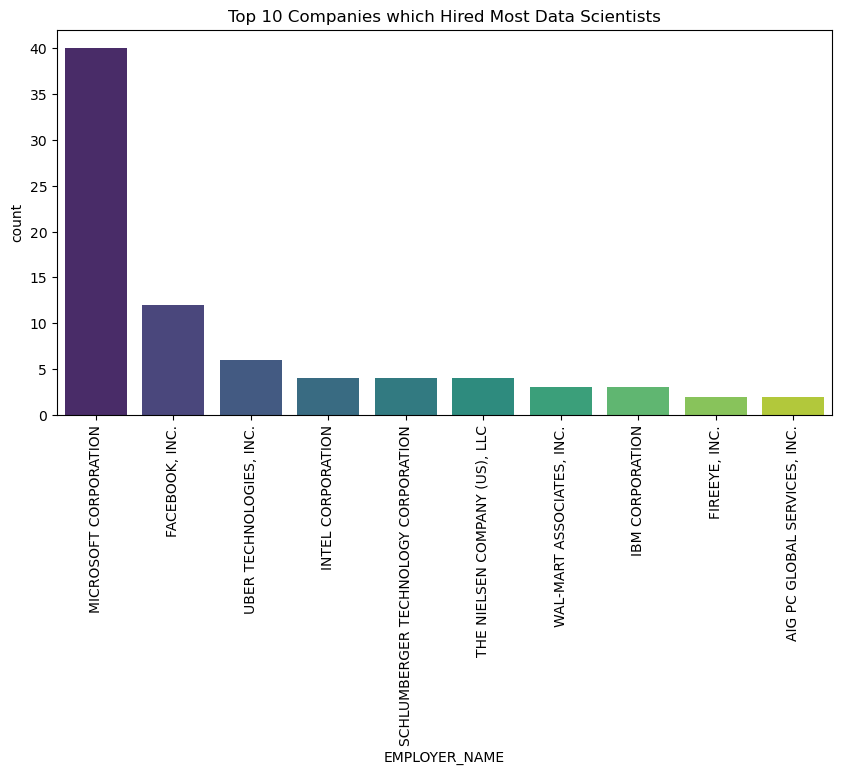

In [25]:
plt.figure(figsize = (10, 5))
sns.barplot(company_ds.head(10), x = 'EMPLOYER_NAME', y = 'count', palette = 'viridis')

plt.title('Top 10 Companies which Hired Most Data Scientists')
plt.xticks(rotation = 90)
plt.show()

## Average salary for data scientists & Comparison to the mean of all applications

In [26]:
ds = result[result['JOB_TITLE'] == 'DATA SCIENTIST']

In [27]:
print('Average Salary of Data Scientists : ', ds['PREVAILING_WAGE'].mean())
print('Average Salary of All Applicants : ', result['PREVAILING_WAGE'].mean())

print(round(ds['PREVAILING_WAGE'].mean()/result['PREVAILING_WAGE'].mean(), 2), 'Times Higher')

Average Salary of Data Scientists :  88646.04320987655
Average Salary of All Applicants :  75734.58793153218
1.17 Times Higher


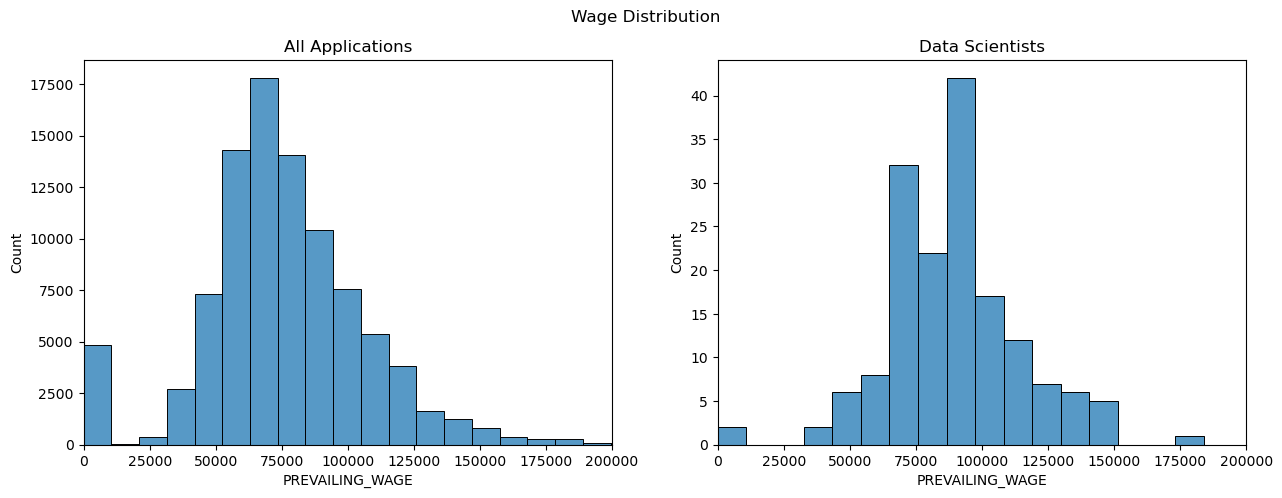

In [28]:
f, axes = plt.subplots(1, 2, figsize = (15, 5), sharex = True)
sns.histplot(ax = axes[0], data = result['PREVAILING_WAGE'], bins = 50)
sns.histplot(ax = axes[1], data = ds['PREVAILING_WAGE'])
f.suptitle('Wage Distribution')
axes[0].set_title('All Applications')
axes[1].set_title('Data Scientists')
plt.xlim((0, 200000))
plt.show()

## States with higher denial proportionally to application & to the population

In [29]:
# Denied by state vs application
denied_rate_total_app = 100 * (result[result['CASE_STATUS'] == 'DENIED'].groupby('EMPLOYER_STATE')['CASE_NUMBER'].count() / result['EMPLOYER_STATE'].value_counts())
denied_rate_total_app = denied_rate_total_app.sort_values(ascending = False)
denied_rate_total_app = pd.DataFrame(denied_rate_total_app).reset_index()
denied_rate_total_app.columns = ['State', 'Denied Rate']

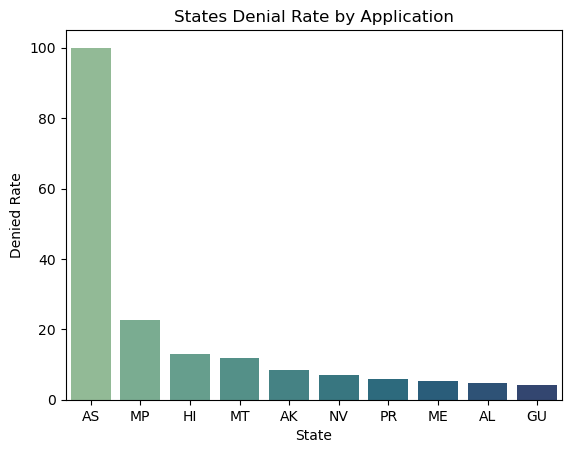

In [30]:
sns.barplot(denied_rate_total_app.head(10), x = 'State', y = 'Denied Rate', palette = 'crest')

plt.title('States Denial Rate by Application')
plt.show()

In [31]:
# Denied by state vs population

In [32]:
denied_rate_pop = result[result['CASE_STATUS'] == 'DENIED'].groupby('EMPLOYER_STATE')['CASE_NUMBER'].count()
denied_rate_pop = pd.DataFrame(denied_rate_pop).reset_index()
denied_rate_pop.columns = ['State', 'Denied Count']

In [33]:
denied_rate_pop = pd.merge(denied_rate_pop, states, how = 'inner', left_on = 'State', right_on = 'State abbreviation')
denied_rate_pop.drop(['State abbreviation', 'State_y'], axis = 1, inplace = True)

In [34]:
denied_rate_pop.rename(columns = {'State_x':'State'}, inplace = True)

In [35]:
denied_rate_pop['Denied Rate'] = 100 * (denied_rate_pop['Denied Count'] / denied_rate_pop['Population estimate'])

In [36]:
denied_rate_pop = denied_rate_pop.sort_values(by = 'Denied Rate', ascending = False)

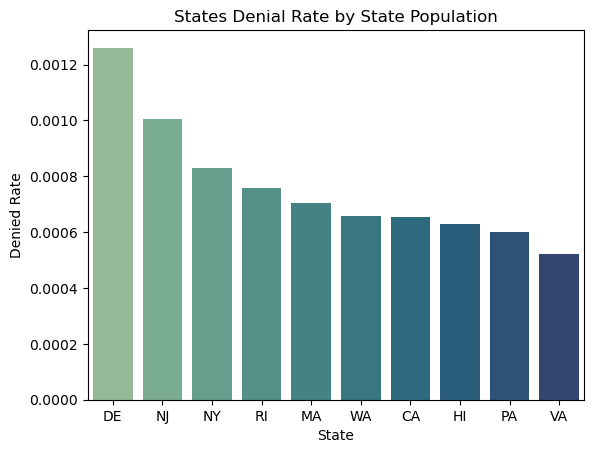

In [37]:
sns.barplot(denied_rate_pop.head(10), x = 'State', y = 'Denied Rate', palette = 'crest')

plt.title('States Denial Rate by State Population')
plt.show()

## Industries that are in the top 5 percentile of applications

In [38]:
result.head(1)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149


In [39]:
result = pd.merge(result, naics, how = 'left', left_on = 'NAICS_CODE', right_on = 'NAICS Code')

In [40]:
result.drop('NAICS Code', axis = 1, inplace = True)

In [41]:
# Clean the whitspace
result['NAICS Title'] = result['NAICS Title'].astype('str') 
result['NAICS Title'] = result['NAICS Title'].apply(lambda x : x.strip())

In [42]:
industry_percentile = pd.DataFrame(result['NAICS Title'].value_counts()).reset_index()

In [43]:
industry_percentile

,NAICS Title,count
0,Custom Computer Programming Services,63882
1,Computer Systems Design and Related Services,17916
2,Computer Systems Design Services,10622
3,"Colleges, Universities, and Professional Schools",10496
4,Software Publishers,5832
...,...,...
998,Noncellulosic Organic Fiber Manufacturing,1
999,Industrial and Commercial Fan and Blower Manuf...,1
1000,"Greenhouse, Nursery, and Floriculture Production",1
1001,Formal Wear and Costume Rental,1


In [44]:
np.percentile(industry_percentile['count'], q = 95)

311.39999999999986

In [45]:
top_5 = []
for i in range(0, len(industry_percentile)) :
    if industry_percentile.iloc[i, 1] > np.percentile(industry_percentile['count'], q = 95) :
        top_5.append(industry_percentile['NAICS Title'][i])

In [46]:
print('{} industries are in top 5 percentile'.format(len(top_5)))
print('Led by these 3 industries : {} '.format(top_5[:3]))

51 industries are in top 5 percentile
Led by these 3 industries : ['Custom Computer Programming Services', 'Computer Systems Design and Related Services', 'Computer Systems Design Services'] 


## Role of the month of the application & decision dates in denied processes

In [47]:
result['APP_MONTH'] = result['CASE_SUBMITTED'].apply(lambda x : x.split('-')[1])

In [48]:
month_total = pd.DataFrame(result['APP_MONTH'].value_counts()).reset_index()

In [49]:
result_by_app_month = pd.DataFrame(result.groupby('APP_MONTH')['CASE_STATUS'].value_counts()).reset_index()
result_by_app_month = pd.merge(month_total, result_by_app_month, how = 'right', on = 'APP_MONTH')
result_by_app_month.columns = ['APP_MONTH', 'MONTH_TOTAL', 'CASE_STATUS', 'COUNT']

In [50]:
result_by_app_month['Percentage'] = 100 * (result_by_app_month['COUNT'] / result_by_app_month['MONTH_TOTAL'])

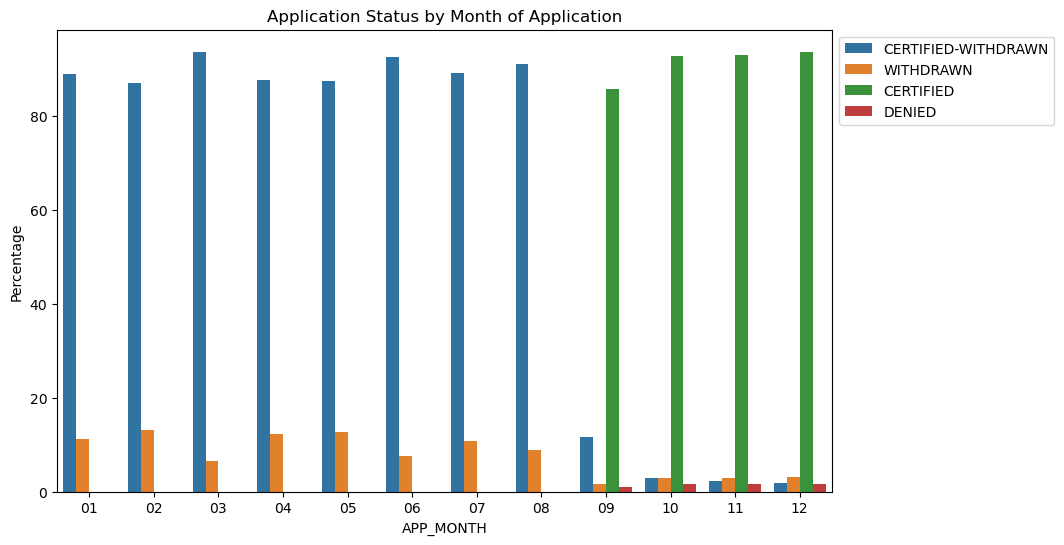

In [51]:
plt.figure(figsize = (10, 6))
sns.barplot(result_by_app_month, x = 'APP_MONTH', y = 'Percentage', hue = 'CASE_STATUS')

plt.title('Application Status by Month of Application')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [52]:
denied_by_app_month = result_by_app_month[result_by_app_month['CASE_STATUS'] == 'DENIED']

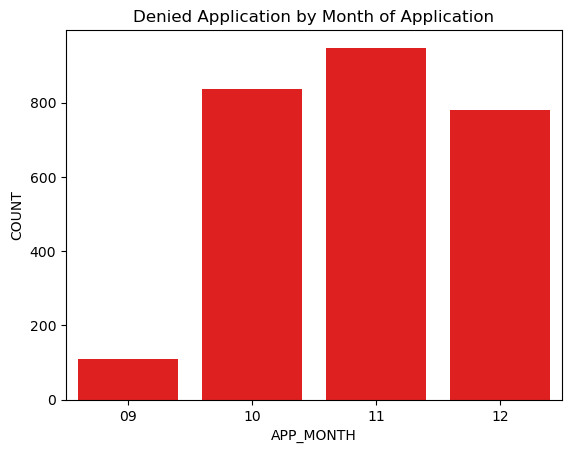

In [53]:
sns.barplot(denied_by_app_month, x = 'APP_MONTH', y = 'COUNT', color = 'red')

plt.title('Denied Application by Month of Application')
plt.show()

In [54]:
# Decision Date

In [55]:
date_total = pd.DataFrame(result['DECISION_DATE'].value_counts()).reset_index()

In [56]:
result_by_dec_date = pd.DataFrame(result.groupby('DECISION_DATE')['CASE_STATUS'].value_counts()).reset_index()
result_by_dec_date = pd.merge(date_total, result_by_dec_date, how = 'right', on = 'DECISION_DATE')
result_by_dec_date.columns = ['DECISION_DATE', 'DATE_TOTAL', 'CASE_STATUS', 'COUNT']

In [57]:
result_by_dec_date['DECISION_DATE'] = result_by_dec_date['DECISION_DATE'].apply(lambda x : pd.to_datetime(x, dayfirst = True))

In [58]:
result_by_dec_date

,DECISION_DATE,DATE_TOTAL,CASE_STATUS,COUNT
0,2016-10-01,8,CERTIFIED-WITHDRAWN,6
1,2016-10-01,8,WITHDRAWN,2
2,2016-11-01,3004,CERTIFIED,2633
3,2016-11-01,3004,CERTIFIED-WITHDRAWN,238
4,2016-11-01,3004,WITHDRAWN,90
...,...,...,...,...
278,2016-10-31,2745,CERTIFIED,2432
279,2016-10-31,2745,CERTIFIED-WITHDRAWN,187
280,2016-10-31,2745,WITHDRAWN,76
281,2016-10-31,2745,DENIED,50


In [59]:
result_by_dec_date['Percentage'] = 100 * (result_by_dec_date['COUNT'] / result_by_dec_date['DATE_TOTAL'])

In [60]:
denied_by_app_month = result_by_dec_date[result_by_dec_date['CASE_STATUS'] == 'DENIED']

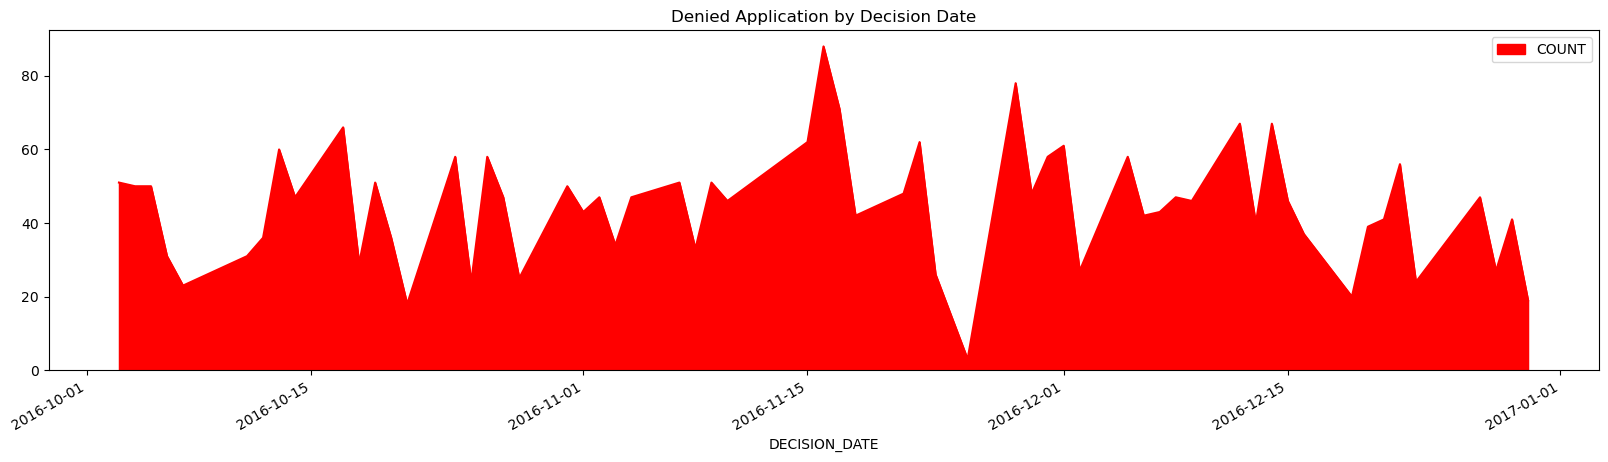

In [61]:
denied_by_app_month.plot(kind = 'area', x = 'DECISION_DATE', y = 'COUNT', figsize = (20, 5), color = 'red')

plt.title('Denied Application by Decision Date')
plt.show()

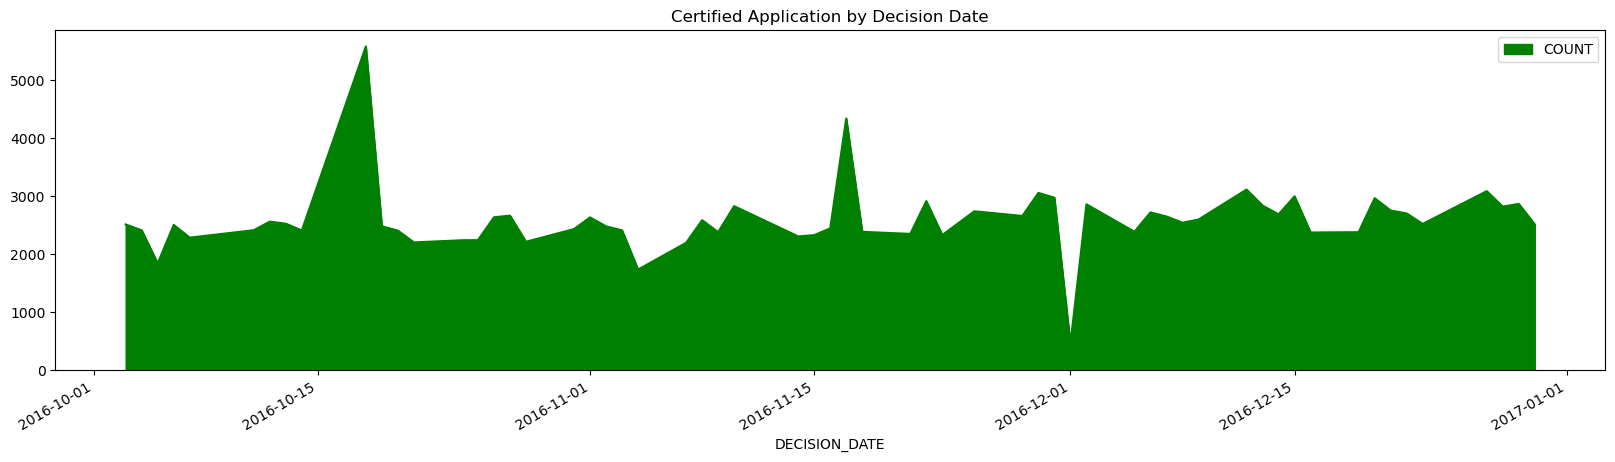

In [62]:
result_by_dec_date[result_by_dec_date['CASE_STATUS'] == 'CERTIFIED'].plot(kind = 'area', x = 'DECISION_DATE', y = 'COUNT', figsize = (20, 5), color = 'green')

plt.title('Certified Application by Decision Date')
plt.show()